In [2]:
import pandas as pd
import os

# --- READ AND VERIFY THE PARQUET FILE ---

# 1. Define the path to your combined Parquet file
#    (Using '../' assuming your notebook is in the 'notebooks' folder)
parquet_file_path = '../data/electricity/processed/demanddata_combined.parquet'

print(f"Loading data from: {parquet_file_path}")

try:
    # 2. Set display option to show ALL columns
    pd.set_option('display.max_columns', None)
    
    # 3. Read the Parquet file
    df = pd.read_parquet(parquet_file_path)
    
    print("✅ Successfully loaded Parquet file.")
    print("--- Displaying First 5 Rows (Complete) ---")
    
    # 4. Display the first 5 rows
    # In a notebook, 'display()' gives a nicer table output
    display(df.head(5))

except FileNotFoundError:
    print(f"❌ Error: Could not find the file.")
    print(f"Please check this path: {parquet_file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Loading data from: ../data/electricity/processed/demanddata_combined.parquet
✅ Successfully loaded Parquet file.
--- Displaying First 5 Rows (Complete) ---


,SETTLEMENT_DATE,SETTLEMENT_PERIOD,ND,TSD,ENGLAND_WALES_DEMAND,EMBEDDED_WIND_GENERATION,EMBEDDED_WIND_CAPACITY,EMBEDDED_SOLAR_GENERATION,EMBEDDED_SOLAR_CAPACITY,NON_BM_STOR,PUMP_STORAGE_PUMPING,SCOTTISH_TRANSFER,IFA_FLOW,IFA2_FLOW,BRITNED_FLOW,MOYLE_FLOW,EAST_WEST_FLOW,NEMO_FLOW,NSL_FLOW,ELECLINK_FLOW,VIKING_FLOW,GREENLINK_FLOW
0,2001-01-01,1,38631,NaN,34060.0,NaN,NaN,NaN,NaN,0,862,NaN,1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-01,2,39808,NaN,35370.0,NaN,NaN,NaN,NaN,0,153,NaN,1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-01,3,40039,NaN,35680.0,NaN,NaN,NaN,NaN,0,18,NaN,1511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001-01-01,4,39339,NaN,35029.0,NaN,NaN,NaN,NaN,0,9,NaN,1958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001-01-01,5,38295,NaN,34047.0,NaN,NaN,NaN,NaN,0,211,NaN,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# --- Cleaning Step 1: Feature Engineering the Date ---

# Create a new column for the year of sale
df['Year'] = df['SETTLEMENT_DATE'].dt.year

# Convert the new year column to a memory-efficient integer type
# Assuming we don't need any special features beyond the integer year
df['Year'] = df['Year'].astype('int16')
print("Created 'Year' column:")
print(df[['SETTLEMENT_DATE', 'Year']].head())

Created 'Year' column:
  SETTLEMENT_DATE  Year
0      2001-01-01  2001
1      2001-01-01  2001
2      2001-01-01  2001
3      2001-01-01  2001
4      2001-01-01  2001


In [8]:
# --- Cleaning Step 2: Standardizing Categorical Columns ---

In [10]:
# --- Cleaning Step 3: Handling  Outliers  ---

In [4]:
# --- Cleaning Step 4: Check for Missing Values (Na-values) ---

print("\nMissing Value Check (Initial):")
print(df.isnull().sum())
print("-" * 30)


Missing Value Check (Initial):
SETTLEMENT_DATE                   0
SETTLEMENT_PERIOD                 0
ND                                0
TSD                           70128
ENGLAND_WALES_DEMAND              0
EMBEDDED_WIND_GENERATION     105168
EMBEDDED_WIND_CAPACITY       105168
EMBEDDED_SOLAR_GENERATION    140256
EMBEDDED_SOLAR_CAPACITY      140256
NON_BM_STOR                       0
PUMP_STORAGE_PUMPING              0
SCOTTISH_TRANSFER            385680
IFA_FLOW                          0
IFA2_FLOW                    140256
BRITNED_FLOW                 140256
MOYLE_FLOW                    70128
EAST_WEST_FLOW               140256
NEMO_FLOW                    140256
NSL_FLOW                     315552
ELECLINK_FLOW                315552
VIKING_FLOW                  315552
GREENLINK_FLOW               315552
Year                              0
dtype: int64
------------------------------


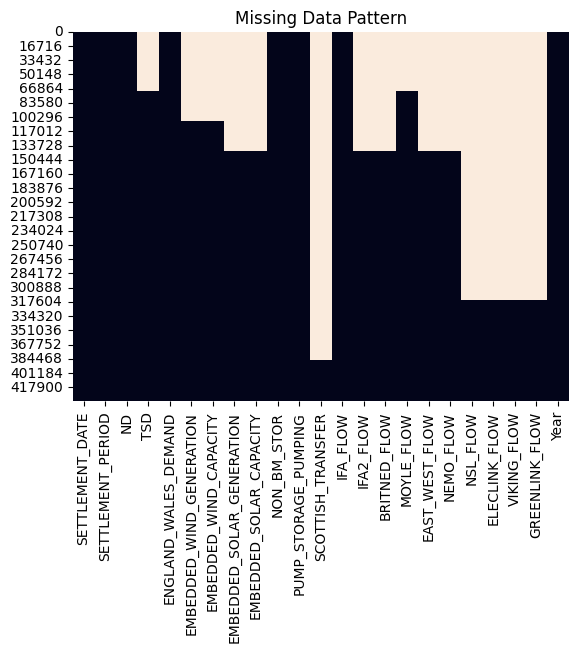

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Pattern")
plt.show()

In [ ]:
df['EMBEDDED_WIND_GENERATION'].fillna(0, inplace=True)
df['EMBEDDED_SOLAR_GENERATION'].fillna(0, inplace=True)

#Just add here the rest of the colums that have null values same as the two lines above

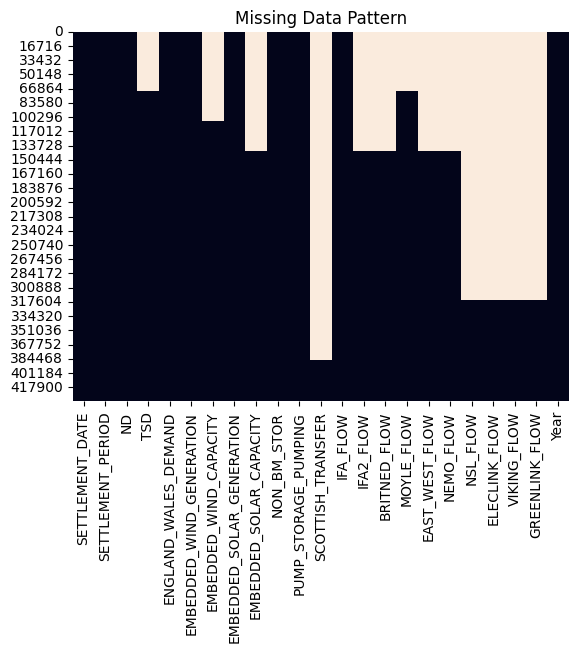

In [8]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Data Pattern")
plt.show()